# Curso: Fundamentos de Python 

Profesor: Andrés Mena

Estudiante: Antonio Sánchez Zárate 



Bienvenido al sistema de análisis de reservas Rent a Car

--- Análisis de Reservas ---
1. Países más frecuentes
2. Números de vuelo más frecuentes
3. Modelos de vehículo más rentados
4. Promedio de duración de la renta
5. Día de anticipo de la renta
6. Comparar reservas Europa vs EEUU
7. Ver todos los datos
8. Ver cantidad de rentas por mes
9. Ver gráfico de rentas por mes
10. Salir


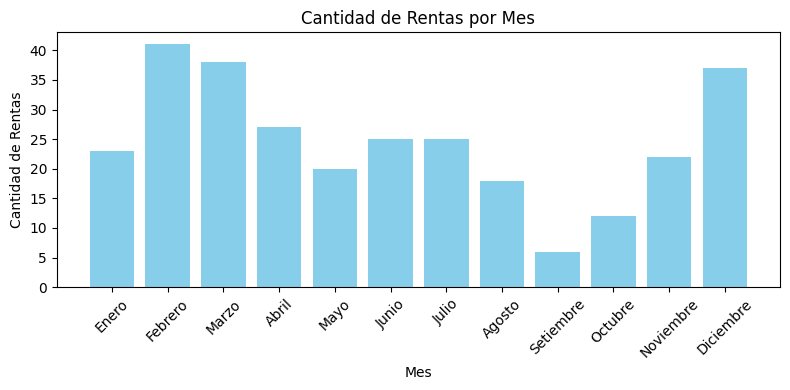


--- Análisis de Reservas ---
1. Países más frecuentes
2. Números de vuelo más frecuentes
3. Modelos de vehículo más rentados
4. Promedio de duración de la renta
5. Día de anticipo de la renta
6. Comparar reservas Europa vs EEUU
7. Ver todos los datos
8. Ver cantidad de rentas por mes
9. Ver gráfico de rentas por mes
10. Salir
Gracias por usar el sistema.


In [6]:
"""
Autor: Antonio Sánchez
Fecha: 2025-04-30
Versión: 0.6
Sistema de análisis de reservas Rent a Car
"""

import pandas as pd  # importar pandas para los DataFrame
import os  # importar os para las funciones del sistema y para el archivo CSV
import matplotlib.pyplot as plt  # importar matplotlib para graficar

# Limpiar pantalla para que no se vayan acumulando los resultados
def limpiar_pantalla():
    os.system('cls' if os.name == 'nt' else 'clear')

# Pausar hasta que el usuario presione Enter
def pausar():
    input('\nPresione Enter para continuar...')

# Cargar datos desde archivo CSV
def cargar_datos(nombre_archivo):
    try:
        df = pd.read_csv(nombre_archivo, sep=';', encoding='utf-8')
        return df
    except FileNotFoundError:
        print("Archivo no encontrado.")
        return None

# Mostrar las ciudadanías más frecuentes entre los clientes
def mostrar_paises(df):
    print("\nPaíses (ordenados por frecuencia):")
    for pais, cantidad in df["País"].value_counts().items():
        print(f"{pais}: {cantidad}")

# Mostrar vuelos más frecuentes
def mostrar_vuelos(df):
    print("\nNúmeros de vuelo más frecuentes:")
    for vuelo, cantidad in df["Vuelo"].value_counts().items():
        print(f"{vuelo}: {cantidad}")

# Mostrar los modelos más alquilados
def mostrar_carros(df):
    print("\nModelos de vehículo más rentados:")
    for carro, cantidad in df["Carro"].value_counts().items():
        print(f"{carro}: {cantidad}")

# Mostrar promedio de duración de las rentas
def mostrar_promedio_dias(df):
    promedio = df["Días"].mean()
    print(f"\nEl promedio de duración de las rentas fue de: {promedio:.2f} días")

# Mostrar promedio de días de anticipación
def dias_anticipico(df):
    promedio = df["Días de Anticipación"].mean()
    print(f"\nEn promedio, los clientes reservaron con {promedio:.2f} días de anticipación")

# Comparar reservas entre Europa y EEUU
def comparar_europa_vs_eeuu(df):
    paises_europa = [
        "España", "Francia", "Alemania", "Italia", "Países Bajos", "Suecia", "Noruega", "Suiza", "Bélgica", "Portugal",
        "Reino Unido", "Irlanda", "Dinamarca", "Austria", "Polonia", "Grecia", "Finlandia", "República Checa", "Hungría",
        "Rumania", "Turquía", "Islandia", "Malta", "Eslovaquia"
    ]
    europa = df["País"].isin(paises_europa)
    eeuu = df["País"] == "Estados Unidos"

    total_europa = europa.sum()
    total_eeuu = eeuu.sum()

    print("\nComparación de reservas:")
    print(f"{'Grupo':<25} {'Cantidad de Reservas'}")
    print(f"{'Europa':<25} {total_europa}")
    print(f"{'EEUU':<25} {total_eeuu}")

# Mostrar todas las filas del DataFrame
def mostrar_todos_los_datos(df):
    print("\n--- Todos los datos de reservas ---")
    print(df)

# Mostrar cantidad de rentas por mes
def mostrar_rentas_por_mes(df):
    print("\nCantidad de rentas por mes:")

    orden_meses = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Setiembre", "Octubre", "Noviembre", "Diciembre"
    ]

    mensual = df["Mes de reserva"].value_counts().reindex(orden_meses, fill_value=0)

    for mes, cantidad in mensual.items():
        print(f"{mes:<12} {cantidad}")

# Graficar las rentas mensuales en un gráfico de barras
def graficar_rentas_por_mes(df):
    orden_meses = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Setiembre", "Octubre", "Noviembre", "Diciembre"
    ]

    mensual = df["Mes de reserva"].value_counts().reindex(orden_meses, fill_value=0)

    plt.figure(figsize=(8, 4)) #ajustar el tamaño de la gráfica 
    plt.bar(mensual.index, mensual.values, color='skyblue') #de barras muestra mejor las rentas mensuales
    plt.title("Cantidad de Rentas por Mes")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de Rentas")
    plt.xticks(rotation=45) #rota los nombres de los meses; sino, setiembre chocaba
    plt.tight_layout() #ajusta todo automáticamente dentro de la gráfica 
    plt.show()

# Menú principal
def menu():
    print("Bienvenido al sistema de análisis de reservas Rent a Car")

    datos = cargar_datos("C:/Users/antos/OneDrive/Documents/2025C1-G01-FUNDAMENTOS-DE-PYTHON/Proyectos/Proyecto Final/reservas.csv")
    if datos is None:
        print("No se pudieron cargar los datos.")
        return

    while True:
        limpiar_pantalla()
        print("\n--- Análisis de Reservas ---")
        print("1. Países más frecuentes")
        print("2. Números de vuelo más frecuentes")
        print("3. Modelos de vehículo más rentados")
        print("4. Promedio de duración de la renta")
        print("5. Día de anticipo de la renta")
        print("6. Comparar reservas Europa vs EEUU")
        print("7. Ver todos los datos")
        print("8. Ver cantidad de rentas por mes")
        print("9. Ver gráfico de rentas por mes")  # nueva opción
        print("10. Salir")
        opcion = input("Seleccione una opción: ")

        if opcion == "1":
            mostrar_paises(datos)
        elif opcion == "2":
            mostrar_vuelos(datos)
        elif opcion == "3":
            mostrar_carros(datos)
        elif opcion == "4":
            mostrar_promedio_dias(datos)
        elif opcion == "5":
            dias_anticipico(datos)
        elif opcion == "6":
            comparar_europa_vs_eeuu(datos)
        elif opcion == "7":
            mostrar_todos_los_datos(datos)
        elif opcion == "8":
            mostrar_rentas_por_mes(datos)
        elif opcion == "9":
            graficar_rentas_por_mes(datos)
        elif opcion == "10":
            print("Gracias por usar el sistema.")
            break
        else:
            print("Opción no válida.")
        pausar()

# Ejecutar el sistema
if __name__ == '__main__':
    menu()